In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

x = λx − x^3

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

In [2]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1e-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

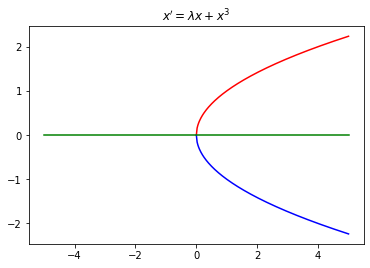

In [3]:
def F(x, lamb):
    return lamb*x - x**3

# calculate the top curve of the bifurcation #####################
C_1, X_1 = EmbeddingAlg(np.linspace(5, 0, 200), np.sqrt(5), F)

# calculate the bottom curve of the bifurcation ##################
C_2, X_2 = EmbeddingAlg(np.linspace(5, 0, 200), -np.sqrt(5), F)
C_3, X_3 = EmbeddingAlg(np.linspace(5, -5, 200), 0, F)

# plot the results ###############################################
plt.plot(C_1, X_1, color='red')
plt.plot(C_2, X_2, color='blue')
plt.plot(C_3, X_3, color='green')
plt.title("$x'=\lambda x+x^3$")
plt.show()

# Problem 2
Create bifurcation diagrams for the diffrential equation

x = η + λx − x^3,

where η = −1, −.2, .2 and 1. Notice that when η = 0 you can see the pitchfork bifurcation of
the previous problem. T

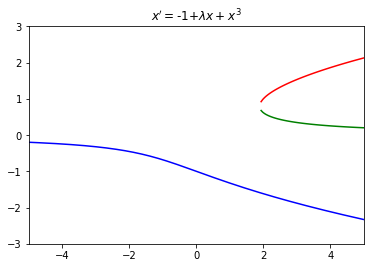

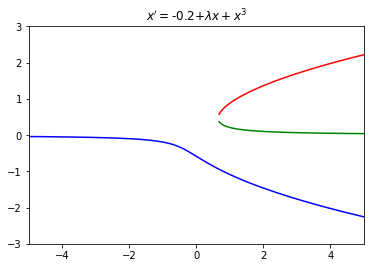

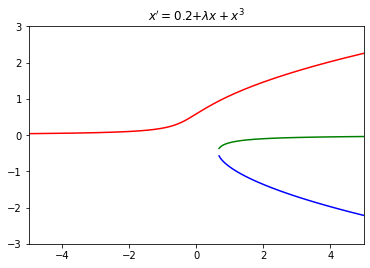

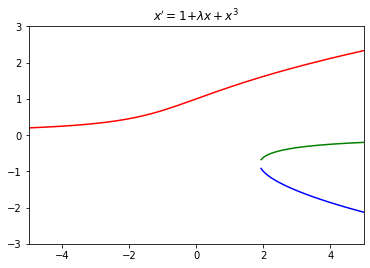

In [5]:
def F_1(x, lamb):
    return -1 + lamb*x - x**3

def F_2(x, lamb):
    return -.2 + lamb*x - x**3

def F_3(x, lamb):
    return .2 + lamb*x - x**3

def F_4(x, lamb):
    return 1 + lamb*x - x**3

n = [-1, -.2, .2, 1]
F = [F_1,F_2,F_3,F_4]
i = 0

for f in F:
    # calculate the top curve of the bifurcation #####################
    C_1, X_1 = EmbeddingAlg(np.linspace(5, -5, 200), np.sqrt(5), f)
    
    # calculate the bottom curve of the bifurcation ##################
    C_2, X_2 = EmbeddingAlg(np.linspace(5, -5, 200), -np.sqrt(5), f)
    C_3, X_3 = EmbeddingAlg(np.linspace(5, -5, 200), 0, f)

    # plot the results ###############################################
    plt.plot(C_1, X_1, color='red')
    plt.plot(C_2, X_2, color='blue')
    plt.plot(C_3, X_3, color='green')
    plt.xlim([-5,5])
    plt.ylim([-3,3])
    plt.title("$x'= $"+str(n[i])+"$ + \lambda x + x^3$")
    plt.show()
    i += 1

# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

dx/dτ = rx(1 − x/k) −x^2/(1 + x)^2,

where r = 0.56

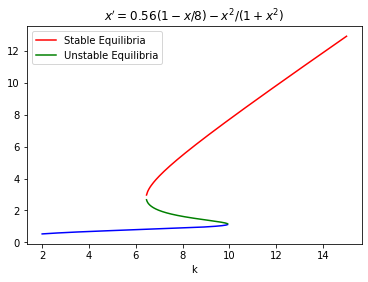

In [6]:
def F(x, lamb):
    return 0.56*x*(1-x/lamb)-(x**2)/(1+x**2)

# calculate the top curve of the bifurcation #####################
#C_1, X_1 = EmbeddingAlg(np.linspace(10, 0, 200), .5, F)
C_1, X_1 = EmbeddingAlg(np.linspace(15, 5, 200), 10, F)

# calculate the bottom curve of the bifurcation ##################
#C_2, X_2 = EmbeddingAlg(np.linspace(10, 0, 200), .45, F)
C_2, X_2 = EmbeddingAlg(np.linspace(2, 10, 200), 1, F)

#C_3, X_3 = EmbeddingAlg(np.linspace(10, 0, 200), .2, F)
C_3, X_3 = EmbeddingAlg(np.linspace(C_2[-1], C_1[-1], 200)[::-1], 2, F)


# plot the results ###############################################
plt.plot(C_1, X_1, color='red', label='Stable Equilibria')
plt.plot(C_2, X_2, color='blue')
plt.plot(C_3, X_3, color='green', label='Unstable Equilibria')
plt.title("$x'= 0.56(1-x/8)-x^2/(1+x^2)$")
plt.xlabel('k')
plt.legend()
plt.show()